# PyPlot 3D
Matlab-like plotting in _Julia_ using PyPlot based on [matplotlib](http://matplotlib.org/api/pyplot_api.html) API
* Need to install [PyPlot](https://github.com/JuliaPy/PyPlot.jl) package
* Some nice examples can be found also [here](https://gist.github.com/gizmaa/7214002)

#### Load/import packages used in this notebook

In [1]:
using PyPlot

## Surf
* Plot surfaces using `surf` function
* Set colormap
* Set labels
* Change view
* Set x/y/z ticks
* Add points to plot (Matlab plot3 alternative)

#### Generate data
* `longitude`, `latitdude`, and `z`

In [2]:
# Generate data
# Use meshgrid just like in Matlab 
function meshgrid(x,y)
    xi = [j for i in y, j in x];
    yi = [i for i in y, j in x];
    return xi, yi;
end

lon,lat = meshgrid(-180:2:180,90:-2:-90);
z = lon.*0.01 + lat.*0.03;

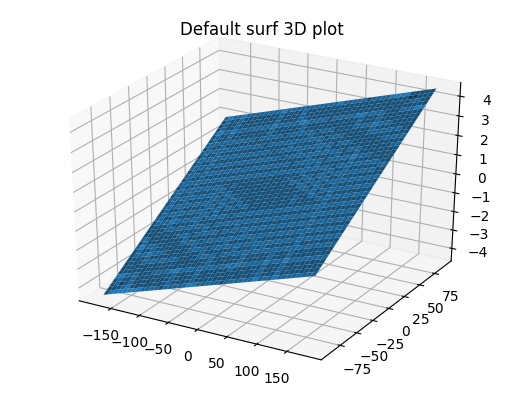

In [3]:
# Default plot is without colors
surf(lon,lat,z)
title("Default surf 3D plot");

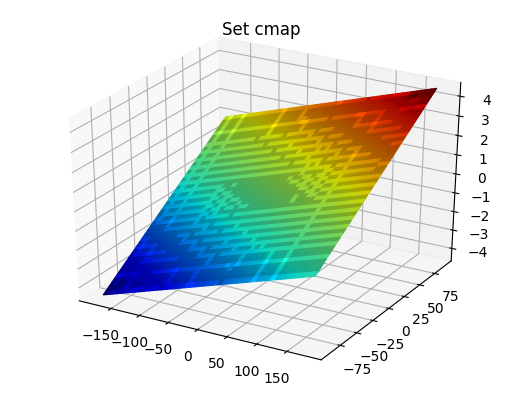

In [4]:
# Set colormap: normalize range of Z to 0-1 range
colmap(z) = (z-minimum(z))/maximum(z-minimum(z));
surf(lon,lat,z,
    facecolors=get_cmap("jet")(colmap(z)),
    edgecolors=[]);# no eddgecolor
title("Set cmap");

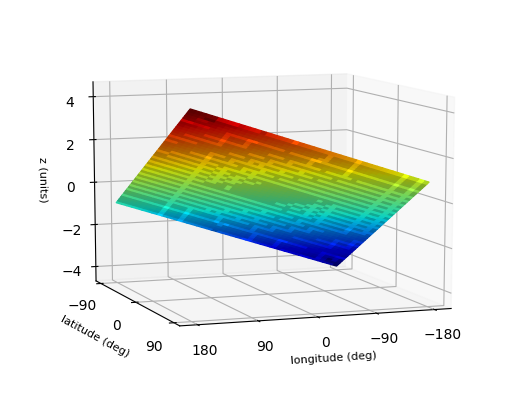

In [5]:
# Add some labels, change view, ticks,...
surf(lon,lat,z,
    facecolors=get_cmap("jet")(colmap(z)),
    edgecolors=[]);# no eddgecolor

# change viewing angle
ax = gca(projection="3d")
ax[:view_init](10,70); # doesn't work like view(0,90) in Matlab

# Change ticks
xticks(-180:90:180);
yticks(-90:90:90);
zticks(-4:2:4)

# Add labels
xlabel("longitude (deg)",fontsize=8)
ylabel("latitude (deg)",fontsize=8,rotation=90)
zlabel("z (units)",fontsize=8);# rotation="horizontal" doesn't work

## Countour
* Plot countours to existing axes
* Set linewidth
* Change levels/spacing between lines
* Change fontsize
* Change label precision
* Print result

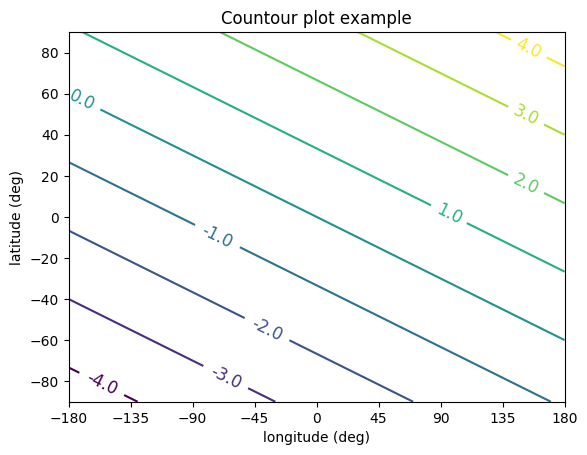

In [61]:
# Create new axes (just like in Matlab)
ax = axes();
# Plot countours: with step/level=1
lev = -4:1:4; # => step = 1
cont_handle = ax[:contour](lon, lat, z, 
                            lev, # level without keyword
                            linewidth=1);
# Change labeling inside the contour plot
ax[:clabel](cont_handle, 
        inline=true, # set lables inside the line
        fontsize=12,
        fmt="%1.1f"); # one decimal place

# Set plot limits + xtick
xlim([-180,180]);
ylim([-90,90]);
xticks(-180:45:180);
xlabel("longitude (deg)");
ylabel("latitude (deg)")
title("Countour plot example")
# 
# Print
#savefig("contour_plot.jpg",dpi=300);

## Contourf
* Filled countour plot
* Add colorbar + colorbar ticks + colorbar lable
* Set color limit

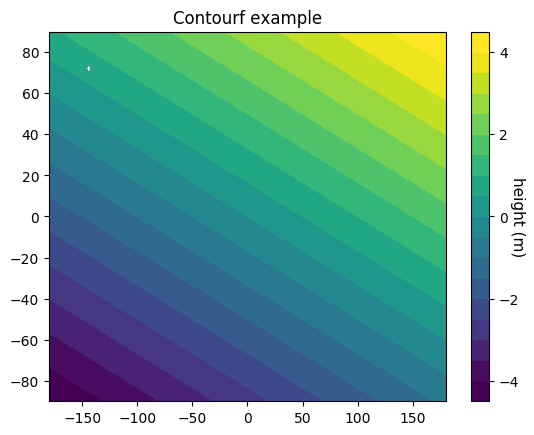

In [88]:
# Set number of levels (the higher, the finer resolution)
lev_num = length(lev)*2;
contourf(lon,lat,z, lev_num);

# Add colorbar
bar_handle = colorbar(ticks=-4:2:4);# set colorbar ticks
# Set colorbar label
bar_handle[:set_label]("height (m)",rotation=270,fontsize=11)

# limit color range (in this case the same as default range)
clim([-4,4]) 
title("Contourf example");